## Shubhankar Kulkarni

## 013734422

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,LeaveOneOut, KFold,cross_val_predict,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,precision_recall_fscore_support as score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import warnings

In [16]:
csv1 = pd.read_csv('batch1.dat', sep='\s+', header=None, skiprows=1)
csv2 = pd.read_csv('batch2.dat', sep='\s+', header=None, skiprows=1)
csv3 = pd.read_csv('batch3.dat', sep='\s+', header=None, skiprows=1)
csv4 = pd.read_csv('batch4.dat', sep='\s+', header=None, skiprows=1)
csv5 = pd.read_csv('batch5.dat', sep='\s+', header=None, skiprows=1)
csv6 = pd.read_csv('batch6.dat', sep='\s+', header=None, skiprows=1)
csv7 = pd.read_csv('batch7.dat', sep='\s+', header=None, skiprows=1)
csv8 = pd.read_csv('batch8.dat', sep='\s+', header=None, skiprows=1)
csv9 = pd.read_csv('batch9.dat', sep='\s+', header=None, skiprows=1)
csv10 = pd.read_csv('batch10.dat', sep='\s+', header=None, skiprows=1)

In [3]:
frames = [csv4,csv5,csv6,csv7,csv8,csv9]
training = pd.concat(frames)

frames1 = [csv10]
test = pd.concat(frames1)

In [4]:
training.shape

(7029, 129)

In [5]:
test.shape

(3599, 129)

In [6]:
X_train = training.iloc[:, 1:].values 
y_train = training.iloc[:,0].values

X_test = test.iloc[:, 1:].values 
y_test = test.iloc[:,0].values

## Feature Scaling

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Random Forest with Grid Search CV

In [11]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
parameters = {'n_estimators': [50,100,200,300,500],'criterion': ['gini','entropy']}

grid_search = GridSearchCV(estimator = rf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_
print(f'Best Set of HyperParameters is {best_parameters}')
print(f'Accuracy of the Best Model is {best_accuracy}')   

f:\new folder (2)\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Set of HyperParameters is {'criterion': 'entropy', 'n_estimators': 200}
Accuracy of the Best Model is 0.9275857163181107


## Random Forest with Cross Validation 

In [8]:
n_est = [50,100,200,300,500]
validation_accuracies_random_forest = []
for n in n_est:
    rf = RandomForestClassifier(n_estimators = n, criterion = 'entropy', random_state = 0)
    rf.fit(X_train, y_train)
    x = cross_val_score(estimator = rf, X = X_train, y = y_train,cv=3).mean()*100
    x = np.round(x,3)
    validation_accuracies_random_forest.append(x)
    print(f'Accuracy for {n: >{3}} trees is {x: >{6}}') 

Accuracy for  50 trees is 92.357
Accuracy for 100 trees is 92.713
Accuracy for 200 trees is 92.756
Accuracy for 300 trees is 92.571
Accuracy for 500 trees is 92.542


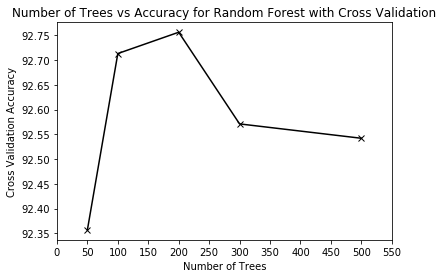

In [9]:
plt.plot(n_est,validation_accuracies_random_forest,'k-x')
plt.xlabel('Number of Trees')
plt.ylabel('Cross Validation Accuracy')
plt.title('Number of Trees vs Accuracy for Random Forest with Cross Validation')
plt.xticks(np.arange(0,600,50))
plt.show()

## Random Forest on Test Set Data

In [10]:
n_est = [50,100,200,300,500]
test_set_accuracies_random_forest = []
for n in n_est:
    rf = RandomForestClassifier(n_estimators = n,criterion = 'entropy', random_state = 0)
    rf_model = rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    random_forest_accuracy = accuracy_score(y_test, y_pred_rf,normalize = False)
    random_forest_accuracy_rate = random_forest_accuracy/(len(y_test)) * 100
    test_set_accuracies_random_forest.append(random_forest_accuracy_rate)
    precision,recall,fscore,support = score(y_test , y_pred_rf,average = 'weighted')
    print(f'Number of Trees : {n: >{4}}  Precision : {np.round(precision,3)} / Recall :{np.round(recall,3)}/ Accuracy : {np.round(random_forest_accuracy_rate,3)}')

Number of Trees :   50  Precision : 0.606 / Recall :0.558/ Accuracy : 55.793
Number of Trees :  100  Precision : 0.617 / Recall :0.567/ Accuracy : 56.738
Number of Trees :  200  Precision : 0.623 / Recall :0.578/ Accuracy : 57.822
Number of Trees :  300  Precision : 0.622 / Recall :0.577/ Accuracy : 57.655
Number of Trees :  500  Precision : 0.618 / Recall :0.576/ Accuracy : 57.627


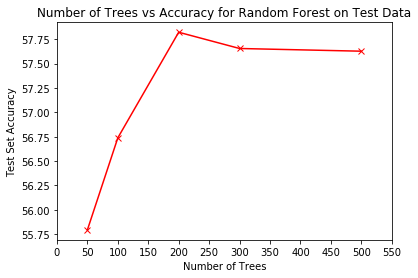

In [11]:
plt.plot(n_est,test_set_accuracies_random_forest,'r-x')
plt.xlabel('Number of Trees')
plt.ylabel('Test Set Accuracy')
plt.title('Number of Trees vs Accuracy for Random Forest on Test Data')
plt.xticks(np.arange(0,600,50))
plt.show()

## Random Forest with PCA

In [12]:
n_components = [16,32,48,64]
for n in n_components:    
    pca = PCA(n_components = n)
    X_train_transform = pca.fit_transform(X_train)
    X_test_transform = pca.transform(X_test)
    rf = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
    rf.fit(X_train_transform , y_train)
    y_pred = rf.predict(X_test_transform)
    PCA_Accuracy = accuracy_score(y_test, y_pred,normalize = False)
    accuracy = PCA_Accuracy/(len(y_test))*100
    print(f'Accuracy of the Model with Principal Components {n} is {round(accuracy,3)}')

Accuracy of the Model with Principal Components 16 is 66.157
Accuracy of the Model with Principal Components 32 is 62.128
Accuracy of the Model with Principal Components 48 is 60.267
Accuracy of the Model with Principal Components 64 is 63.684


In [13]:
pca = PCA(n_components = 48)
X_train_transform_pca = pca.fit_transform(X_train)
X_test_transform_pca = pca.transform(X_test)

## Random Forest with Cross Validation and PCA

In [14]:
n_est = [50,100,200,300,500]
validation_accuracies_random_forest_pca = []
for n in n_est:
    rf_pca = RandomForestClassifier(n_estimators = n, criterion = 'entropy', random_state = 0)
    rf_pca.fit(X_train_transform_pca, y_train)
    x = cross_val_score(estimator = rf_pca, X = X_train_transform_pca, y = y_train,cv=3).mean()*100
    x = np.round(x,3)
    validation_accuracies_random_forest_pca.append(x)
    print(f'Accuracy for {n: >{3}} trees is {x}') 

Accuracy for  50 trees is 92.214
Accuracy for 100 trees is 92.101
Accuracy for 200 trees is 92.172
Accuracy for 300 trees is 92.115
Accuracy for 500 trees is 92.314


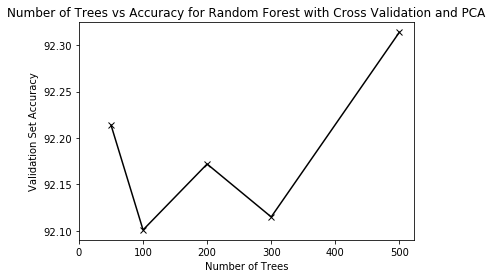

In [15]:
plt.plot(n_est,validation_accuracies_random_forest_pca,'k-x')
plt.xlabel('Number of Trees')
plt.ylabel('Validation Set Accuracy')
plt.title('Number of Trees vs Accuracy for Random Forest with Cross Validation and PCA')
plt.xticks(np.arange(0,600,100))
plt.show()

## Random Forest with PCA on Test Set Data

In [16]:
n_est = [50,100,200,300,500]
test_set_accuracies_random_forest_pca = []
for n in n_est:
    rf = RandomForestClassifier(n_estimators = n,criterion = 'entropy', random_state = 0)
    rf_model = rf.fit(X_train_transform_pca, y_train)
    y_pred = rf.predict(X_test_transform_pca)
    random_forest_accuracy_pca = accuracy_score(y_test, y_pred,normalize = False)
    random_forest_accuracy_rate_pca = random_forest_accuracy_pca/(len(y_test)) * 100
    test_set_accuracies_random_forest_pca.append(random_forest_accuracy_rate_pca)
    print(f'Accuracy of model with {n: >{3}} trees is {round(random_forest_accuracy_rate_pca,3)}') 

Accuracy of model with  50 trees is 64.99
Accuracy of model with 100 trees is 66.046
Accuracy of model with 200 trees is 65.046
Accuracy of model with 300 trees is 64.435
Accuracy of model with 500 trees is 65.129


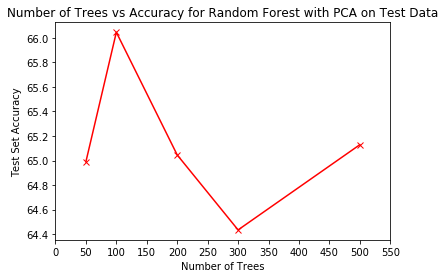

In [17]:
plt.plot(n_est,test_set_accuracies_random_forest_pca,'r-x')
plt.xlabel('Number of Trees')
plt.ylabel('Test Set Accuracy')
plt.title('Number of Trees vs Accuracy for Random Forest with PCA on Test Data')
plt.xticks(np.arange(0,600,50))
plt.show()

## SVM with Grid Search and Cross Validation

In [18]:
svc = SVC(random_state = 0)
svc.fit(X_train, y_train)
parameters = {'C': [1,10,50,100,500,1000], 'kernel': ['linear','rbf'],'decision_function_shape' : ['ovo','ovr'],
              'gamma' : ['scale','auto']}
grid_search = GridSearchCV(estimator = svc,param_grid = parameters,scoring = 'accuracy',n_jobs = -1,cv=3)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_
print(f'Best Set of HyperParameters is {best_parameters}')
print(f'Accuracy of the Best Model is {best_accuracy}')      
              

Best Set of HyperParameters is {'C': 1, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'linear'}
Accuracy of the Best Model is 0.9469341300327215


In [19]:
C = [1,10,50,100,500,1000]
validation_accuracies_svc = []
for i in C:
    svc = SVC(C = i, kernel = 'rbf', random_state = 0, decision_function_shape = 'ovo' ,gamma = 'auto')
    svc.fit(X_train, y_train)
    x = cross_val_score(estimator = svc, X = X_train, y = y_train, cv=3).mean()*100
    validation_accuracies_svc.append(x)
    print(f'Accuracy with Penalty Parameter {i:>{4}} is {round(x,3)}') 

Accuracy with Penalty Parameter    1 is 92.173
Accuracy with Penalty Parameter   10 is 94.549
Accuracy with Penalty Parameter   50 is 94.436
Accuracy with Penalty Parameter  100 is 94.322
Accuracy with Penalty Parameter  500 is 94.293
Accuracy with Penalty Parameter 1000 is 94.379


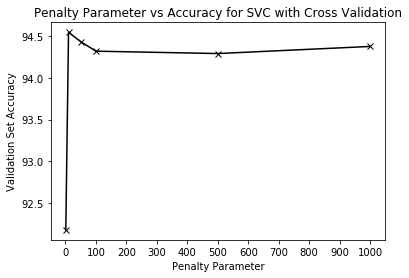

In [20]:
plt.plot(C,validation_accuracies_svc,'k-x')
plt.xlabel('Penalty Parameter')
plt.ylabel('Validation Set Accuracy')
plt.title('Penalty Parameter vs Accuracy for SVC with Cross Validation')
plt.xticks(np.arange(0,1100,100))
plt.show()

## SVC on Test Data

In [21]:
C = [1,10,50,100,500,1000]
test_set_accuracies_svc = []
for i in C:
    svc = SVC(C = i, kernel = 'rbf', random_state = 0, decision_function_shape = 'ovo' ,gamma = 'auto')
    svc.fit(X_train, y_train)
    y_pred_svc = svc.predict(X_test)
    svc_accuracy = accuracy_score(y_test, y_pred_svc,normalize = False)
    svc_accuracy_rate = svc_accuracy/(len(y_test)) * 100
    test_set_accuracies_svc.append(svc_accuracy_rate)
    precision,recall,fscore,support = score(y_test , y_pred_svc,average = 'weighted')
    print(f'Penalty Parameter C : {i: >{4}}  Precision : {np.round(precision,3)} / Recall :{np.round(recall,3)}/ Accuracy : {np.round(svc_accuracy_rate,3)}')

Penalty Parameter C :    1  Precision : 0.659 / Recall :0.576/ Accuracy : 57.627
Penalty Parameter C :   10  Precision : 0.705 / Recall :0.608/ Accuracy : 60.795
Penalty Parameter C :   50  Precision : 0.693 / Recall :0.598/ Accuracy : 59.767
Penalty Parameter C :  100  Precision : 0.689 / Recall :0.597/ Accuracy : 59.739
Penalty Parameter C :  500  Precision : 0.704 / Recall :0.616/ Accuracy : 61.573
Penalty Parameter C : 1000  Precision : 0.703 / Recall :0.615/ Accuracy : 61.517


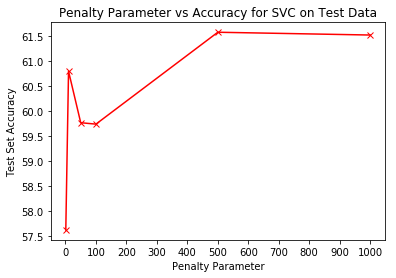

In [22]:
plt.plot(C,test_set_accuracies_svc,'r-x')
plt.xlabel('Penalty Parameter')
plt.ylabel('Test Set Accuracy')
plt.title('Penalty Parameter vs Accuracy for SVC on Test Data')
plt.xticks(np.arange(0,1100,100))
plt.show()

## Decision Tree Classifier with GridSearchCV

In [24]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
parameters = {'criterion': ['gini','entropy'], 'splitter': ['best','random']}
grid_search = GridSearchCV(estimator = decision_tree,param_grid = parameters,scoring = 'accuracy',n_jobs = -1,cv=3)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_
print(f'Best Set of HyperParameters is {best_parameters}')
print(f'Accuracy of the Best Model is {best_accuracy}')    

Best Set of HyperParameters is {'criterion': 'gini', 'splitter': 'best'}
Accuracy of the Best Model is 0.859724000569071


## Decison Tree Classifier with Cross Validation

In [25]:
decision_tree = DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='best')
decision_tree.fit(X_train, y_train)
x = cross_val_score(estimator = decision_tree, X = X_train, y = y_train, cv=3).mean()*100
print(f'Accuracy for Decision Tree Classifier is {round(x,3):>{5}}')

Accuracy for Decision Tree Classifier is 83.376


## Decison Tree on Test data

In [26]:
y_pred_dt = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, y_pred_dt,normalize = False)
decision_tree_accuracy_rate = decision_tree_accuracy/(len(y_test)) * 100
precision,recall,fscore,support = score(y_test , y_pred_dt,average = 'weighted')
print(f'Precision : {np.round(precision,3):>{5}} / Recall :{np.round(recall,3):>{5}}/ Accuracy : {np.round(decision_tree_accuracy_rate,3):>{5}}')

Precision : 0.548 / Recall :0.498/ Accuracy : 49.819


## Gradient Boosting with Grid Search CV

In [44]:
gb = GradientBoostingClassifier(random_state = 0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
# Parameters to Evaluate to find which set of hyperparameters work the best
param = {
    'n_estimators' : [100,500],
    'learning_rate' : [0.01,0.1]
}
gs = GridSearchCV(gb,param,cv=3,n_jobs=-1)
gs.fit(X_train,y_train)
best_accuracy = gs.best_score_ 
best_parameters = gs.best_params_
print(f'Best Set of HyperParameters is {best_parameters}')
print(f'Accuracy of the Best Model is {best_accuracy}')  


Best Set of HyperParameters is {'learning_rate': 0.1, 'n_estimators': 500}
Accuracy of the Best Model is 0.8952909375444587


In [45]:
gb = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 0)
gb.fit(X_train, y_train)
x = cross_val_score(estimator = gb, X = X_train, y = y_train,cv=3).mean()*100
print(f'Accuracy for 500 trees is {x}')

Accuracy for 500 trees is 89.52509742892302


In [46]:
gb = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 0)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred_gb,normalize = False)
gb_accuracy_rate = gb_accuracy/(len(y_test)) * 100
precision,recall,fscore,support = score(y_test,y_pred_gb,average = 'weighted')
print('n_estimators : {} ------- / --- Precision : {} / Recall :{}/ Accuracy : {}'
        .format(500,np.round(precision,3),np.round(recall,3),np.round(gb_accuracy_rate,3)))

n_estimators : 500 ------- / --- Precision : 0.607 / Recall :0.53/ Accuracy : 53.015


## Ensemble Voting Classifier

In [12]:
rf_ensemble = RandomForestClassifier(n_estimators = 300,criterion = 'entropy', random_state = 0)
svc_ensemble = SVC(C = 100, kernel = 'rbf', random_state = 0, decision_function_shape = 'ovo' ,gamma = 'auto')
gb_ensemble = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 0)
log_ensemble = LogisticRegression(random_state=0, solver='newton-cg',multi_class='multinomial')
lda_ensemble = LinearDiscriminantAnalysis()
knn_ensemble = KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm ='auto',p=2)

ensemble_classifier = VotingClassifier(estimators = [('Random Forest',rf_ensemble),
                                                    ('SVC',svc_ensemble),('gradient_boosting',gb_ensemble),
                                                    ('logistic',log_ensemble),('lda',lda_ensemble),
                                                    ('KNN',knn_ensemble)],voting = 'hard')
ensemble_classifier.fit(X_train,y_train)
y_pred_ensemble = ensemble_classifier.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble,normalize = False)
ensemble_accuracy_rate = ensemble_accuracy/(len(y_test)) * 100
precision,recall,fscore,support = score(y_test , y_pred_ensemble,average = 'weighted')
print(f'Precision : {np.round(precision,3):>{5}} / Recall :{np.round(recall,3):>{5}}/ Accuracy : {np.round(ensemble_accuracy_rate,3):>{5}}')

Precision : 0.716 / Recall :0.687/ Accuracy : 68.714


## Ensemble Voting Classifier with PCA

In [14]:
rf_ensemble = RandomForestClassifier(n_estimators = 300,criterion = 'entropy', random_state = 0)
svc_ensemble = SVC(C = 100, kernel = 'rbf', random_state = 0, decision_function_shape = 'ovo' ,gamma = 'auto')
gb_ensemble = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 0)
log_ensemble = LogisticRegression(random_state=0, solver='newton-cg',multi_class='multinomial')
lda_ensemble = LinearDiscriminantAnalysis()
knn_ensemble = KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm ='auto',p=2)

ensemble_classifier = VotingClassifier(estimators = [('Random Forest',rf_ensemble),
                                                    ('SVC',svc_ensemble),('gradient_boosting',gb_ensemble),
                                                    ('logistic',log_ensemble),('lda',lda_ensemble),
                                                    ('KNN',knn_ensemble)],voting = 'hard')
ensemble_classifier.fit(X_train_transform_pca ,y_train)
y_pred_ensemble = ensemble_classifier.predict(X_test_transform_pca )
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble,normalize = False)
ensemble_accuracy_rate = ensemble_accuracy/(len(y_test)) * 100
precision,recall,fscore,support = score(y_test , y_pred_ensemble,average = 'weighted')
print(f'Precision : {np.round(precision,3):>{5}} / Recall :{np.round(recall,3):>{5}}/ Accuracy : {np.round(ensemble_accuracy_rate,3):>{5}}')

Precision : 0.745 / Recall :0.713/ Accuracy : 71.325
